*Calculating the covariance matrix, Eigen values and Eigen vectors for PCA*

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Input matrix
students = np.array([[17,18,13],
                     [13,15,17],
                     [4,6,14],
                     [14,12,11],
                     [8,10,12]])

In [13]:
students

array([[17, 18, 13],
       [13, 15, 17],
       [ 4,  6, 14],
       [14, 12, 11],
       [ 8, 10, 12]])

In [14]:
# Standardization
sc = StandardScaler()
students_scaled = sc.fit_transform(students)
students_scaled

array([[ 1.25495273,  1.4083645 , -0.19425717],
       [ 0.38946809,  0.6799001 ,  1.74831455],
       [-1.55787236, -1.50549309,  0.29138576],
       [ 0.60583925, -0.04856429, -1.16554303],
       [-0.69238772, -0.53420722, -0.6799001 ]])

In [15]:
# Covariance matrix
cov_matrix = np.cov(students_scaled.T, bias= True)
cov_matrix

array([[ 1.        ,  0.94361054, -0.05043798],
       [ 0.94361054,  1.        ,  0.17924528],
       [-0.05043798,  0.17924528,  1.        ]])

In [16]:
# Calculate the Eigen values & Eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues

array([0.02909989, 1.95244946, 1.01845065])

In [6]:
# Show contribution for each Eigen value
total = sum(eigenvalues)
for eigenvalue in eigenvalues:
    print(round(eigenvalue,4), round(eigenvalue/total*100,2))

0.0291 0.97
1.9524 65.08
1.0185 33.95


In [7]:
eigenvectors

array([[ 0.69173547, -0.69792615, -0.18547541],
       [-0.70288369, -0.70962655,  0.04883312],
       [ 0.16570018, -0.09658804,  0.98143477]])

In [27]:
# Multiply principal eigen vectors with the scaled input
Reduced_output = np.matmul(students_scaled, eigenvectors[1:3].T)
Reduced_output = pd.DataFrame(Reduced_output)

Text(0.5, 1.0, 'PC1 vs PC2')

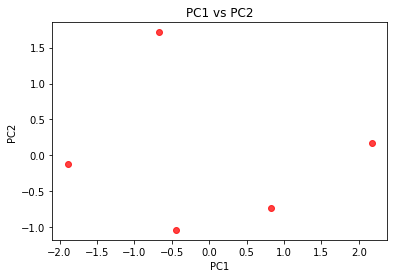

In [36]:
fig, ax = plt.subplots()
ax.scatter(Reduced_output[0], Reduced_output[1], c = "red", alpha=.75)
ax.set_xlabel(r'PC1', fontsize=10)
ax.set_ylabel(r'PC2', fontsize=10)
ax.set_title('PC1 vs PC2')